In [1]:
from trainers.map_based_trainer import MapBasedTrainer
from dataset.map_based.map_based_jacquard import MapBasedJacquard
from utils.map_based_utils import post_process_map_output, grasps_from_map
from utils.grasp_utils import grasp_rect_from_grasps
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from torchvision import transforms

In [27]:
trainer = MapBasedTrainer.load_state("/Users/gursi/Desktop/consens-lab/weights/grconvnet4/Grasp_Step_59_Acc_0.783784_Loss_0.103584.pth")
dataset = MapBasedJacquard(
    image_size=224,
    precision=torch.float32,
    cache_path="/Users/gursi/Desktop/jacquard-cache-test",
    random_augment=False,
)

In [69]:
rgbd, grasp_map, grasp_rect, cls_map = dataset[223]
_, _, _, cls_map = dataset.rotate_augment(270, rgbd, grasp_map, grasp_rect, cls_map, rotate=True)

In [70]:
cls_map = cls_map[1:]
cls_map = torch.cat([cls_map[0].unsqueeze(0), cls_map], dim=0)

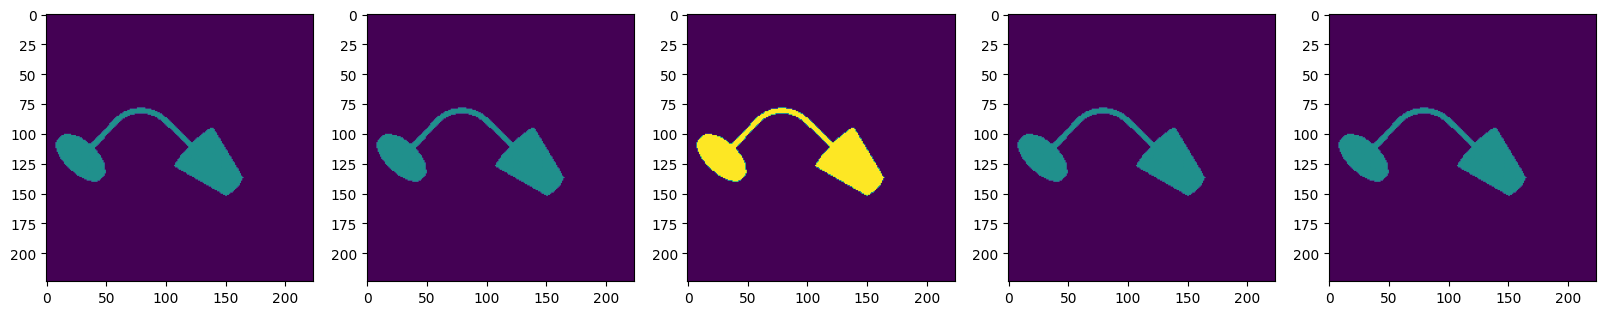

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
ax = ax.flatten()

for axis, map in zip(ax, cls_map):
    img = axis.imshow(map, vmin=-1, vmax=1)

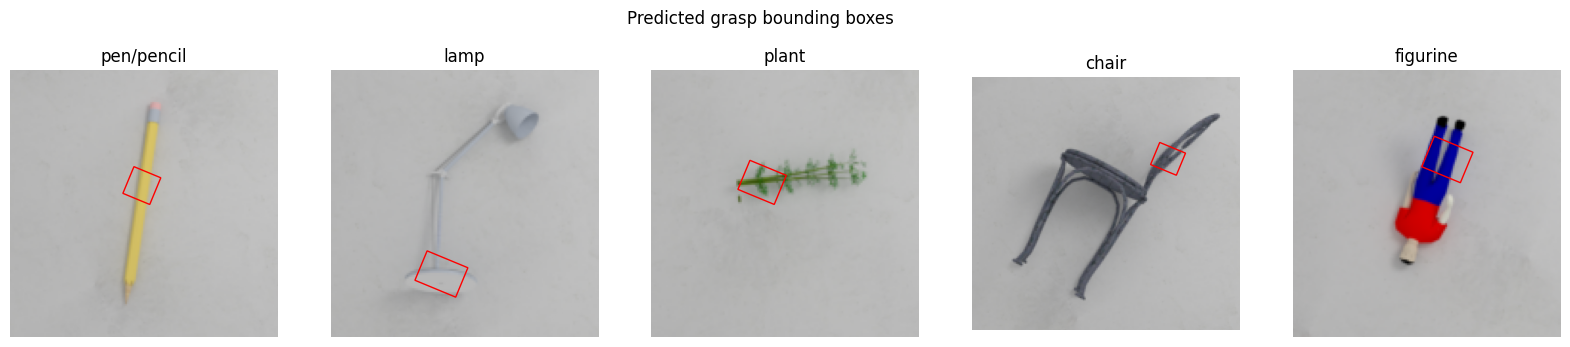

In [286]:
# idxs = [3, 217, 509, 723, 1216]
idxs = [3, 224, 509, 723, 1216]
names = ["pen/pencil", "lamp", "plant", "chair", "figurine"]
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
fig.suptitle("Predicted grasp bounding boxes")
ax = ax.flatten()

xlims = [[50, 200], [50, 190], [50, 190], [30, 210], [50, 190]]
ylims = [[190, 40], [190, 50], [190, 50], [200, 30], [190, 50]]

for idx, axis, name, xlim, ylim in zip(idxs, ax, names, xlims, ylims):
    input_img = dataset[idx][0]
    output = trainer.model(input_img.unsqueeze(0).to("mps"))[0]
    conf, cos, sin, width, length = output.detach().cpu()
    conf, angle, width, length = post_process_map_output(conf, cos, sin, width, length)
    grasps = grasps_from_map(conf, angle, width, length, num_peaks=1)
    rects = grasp_rect_from_grasps(grasps)
    axis.imshow(input_img[:-1].permute(1, 2, 0))
    for rect in rects:
        p = Polygon(rect, linewidth=1, edgecolor="r", facecolor="none")
        axis.add_patch(p)
    axis.set_title(name)
    axis.set_xlim(xlim[0], xlim[1])
    axis.set_ylim(ylim[0], ylim[1])
    axis.axis(False)

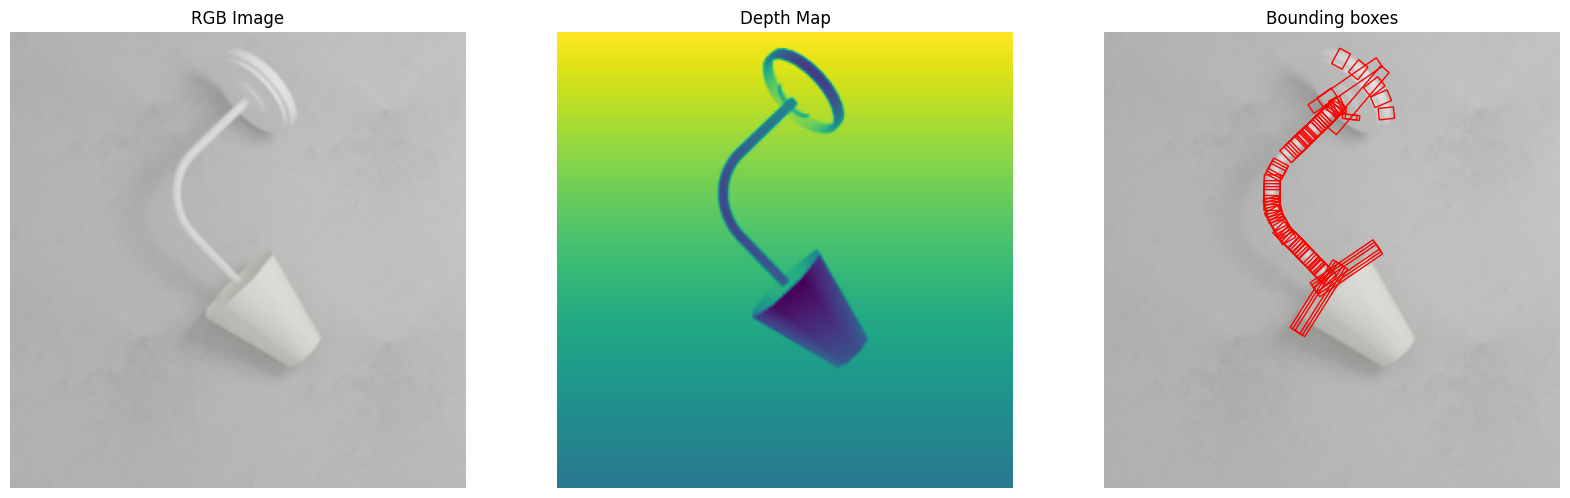

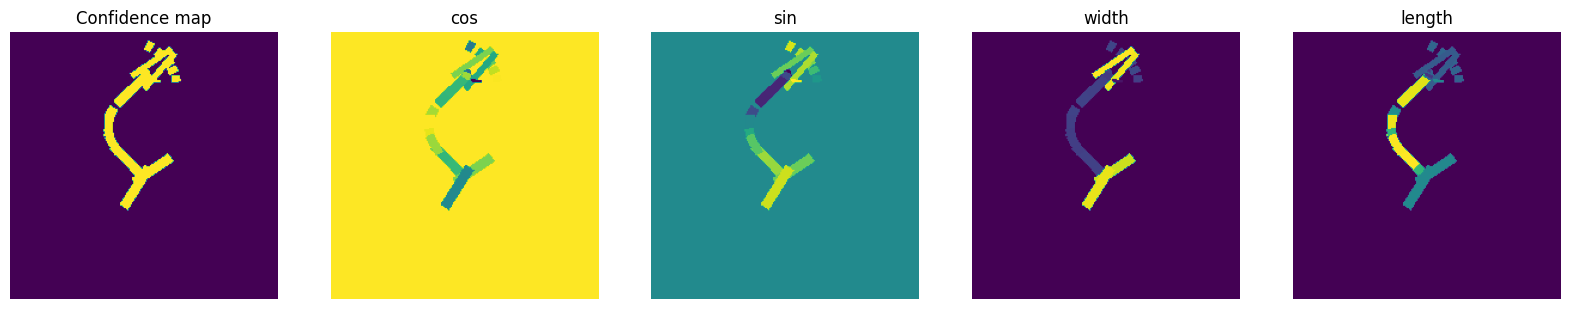

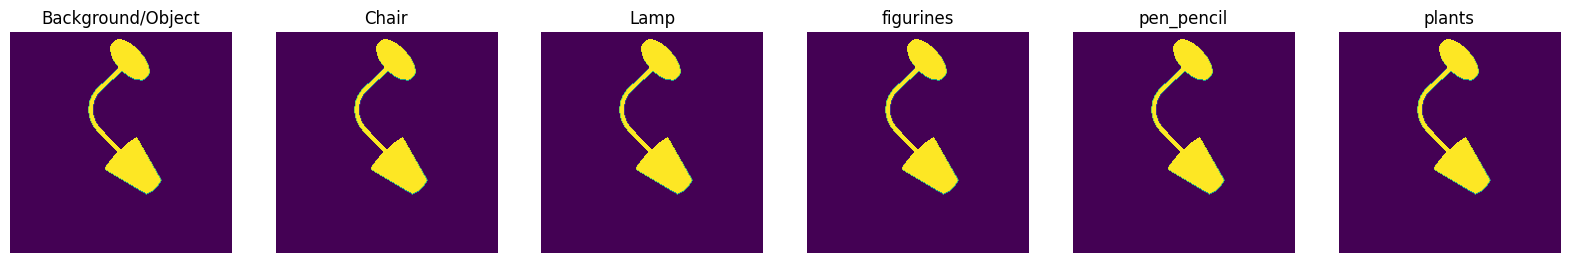

In [288]:
dataset.visualize(223)

In [219]:
for idx in idxs:
    img, depth = dataset[idx][0][:-1], dataset[idx][0][-1]
    img = transforms.ToPILImage()(img)
    depth = transforms.ToPILImage()(depth)
    img.save(f"/Users/gursi/Desktop/imgs/{idx}.png")
    depth.save(f"/Users/gursi/Desktop/imgs/{idx}_depth.tiff")

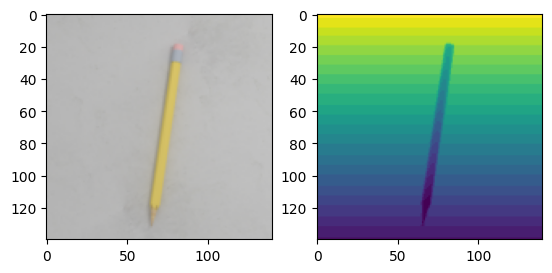

In [220]:
img, depth = Image.open(f"/Users/gursi/Desktop/imgs/{idxs[0]}.png"), Image.open(f"/Users/gursi/Desktop/imgs/{idxs[0]}_depth.tiff")
t = transforms.ToTensor()
img, depth, = t(img)[:, 40:180, 50:190], t(depth)[0, 40:180, 50:190]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.flatten()
ax[0].imshow(img.permute(1, 2, 0))
ax[1].imshow(depth)
plt.show()

transforms.ToPILImage()(img).save(f"/Users/gursi/Desktop/imgs/{idxs[0]}.png")
transforms.ToPILImage()(depth).save(f"/Users/gursi/Desktop/imgs/{idxs[0]}_depth.tiff")

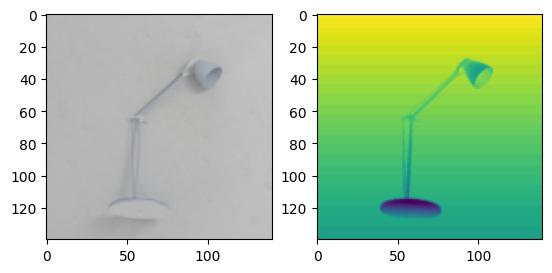

In [222]:
img, depth = Image.open(f"/Users/gursi/Desktop/imgs/{idxs[1]}.png"), Image.open(f"/Users/gursi/Desktop/imgs/{idxs[1]}_depth.tiff")
t = transforms.ToTensor()
img, depth, = t(img)[:, 40:180, 50:190], t(depth)[0, 40:180, 50:190]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.flatten()
ax[0].imshow(img.permute(1, 2, 0))
ax[1].imshow(depth)
plt.show()

transforms.ToPILImage()(img).save(f"/Users/gursi/Desktop/imgs/{idxs[1]}.png")
transforms.ToPILImage()(depth).save(f"/Users/gursi/Desktop/imgs/{idxs[1]}_depth.tiff")

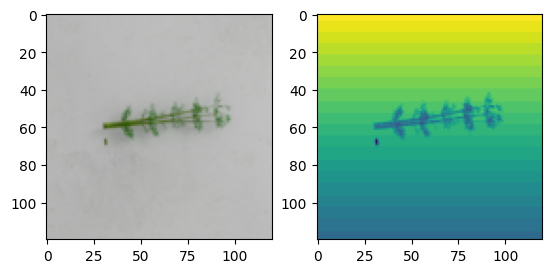

In [231]:
img, depth = Image.open(f"/Users/gursi/Desktop/imgs/{idxs[2]}.png"), Image.open(f"/Users/gursi/Desktop/imgs/{idxs[2]}_depth.tiff")
t = transforms.ToTensor()
img, depth, = t(img)[:, 50:170, 65:185], t(depth)[0, 50:170, 65:185]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.flatten()
ax[0].imshow(img.permute(1, 2, 0))
ax[1].imshow(depth)
plt.show()

transforms.ToPILImage()(img).save(f"/Users/gursi/Desktop/imgs/{idxs[2]}.png")
transforms.ToPILImage()(depth).save(f"/Users/gursi/Desktop/imgs/{idxs[2]}_depth.tiff")

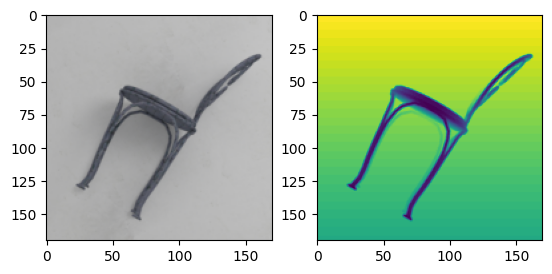

In [239]:
img, depth = Image.open(f"/Users/gursi/Desktop/imgs/{idxs[3]}.png"), Image.open(f"/Users/gursi/Desktop/imgs/{idxs[3]}_depth.tiff")
t = transforms.ToTensor()
img, depth, = t(img)[:, 25:195, 35:205], t(depth)[0, 25:195, 35:205]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.flatten()
ax[0].imshow(img.permute(1, 2, 0))
ax[1].imshow(depth)
plt.show()

transforms.ToPILImage()(img).save(f"/Users/gursi/Desktop/imgs/{idxs[3]}.png")
transforms.ToPILImage()(depth).save(f"/Users/gursi/Desktop/imgs/{idxs[3]}_depth.tiff")

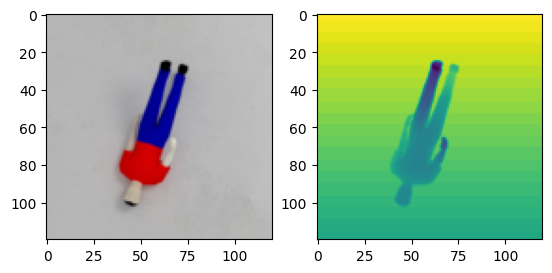

In [241]:
img, depth = Image.open(f"/Users/gursi/Desktop/imgs/{idxs[4]}.png"), Image.open(f"/Users/gursi/Desktop/imgs/{idxs[4]}_depth.tiff")
t = transforms.ToTensor()
img, depth, = t(img)[:, 50:170, 65:185], t(depth)[0, 50:170, 65:185]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax = ax.flatten()
ax[0].imshow(img.permute(1, 2, 0))
ax[1].imshow(depth)
plt.show()

transforms.ToPILImage()(img).save(f"/Users/gursi/Desktop/imgs/{idxs[4]}.png")
transforms.ToPILImage()(depth).save(f"/Users/gursi/Desktop/imgs/{idxs[4]}_depth.tiff")

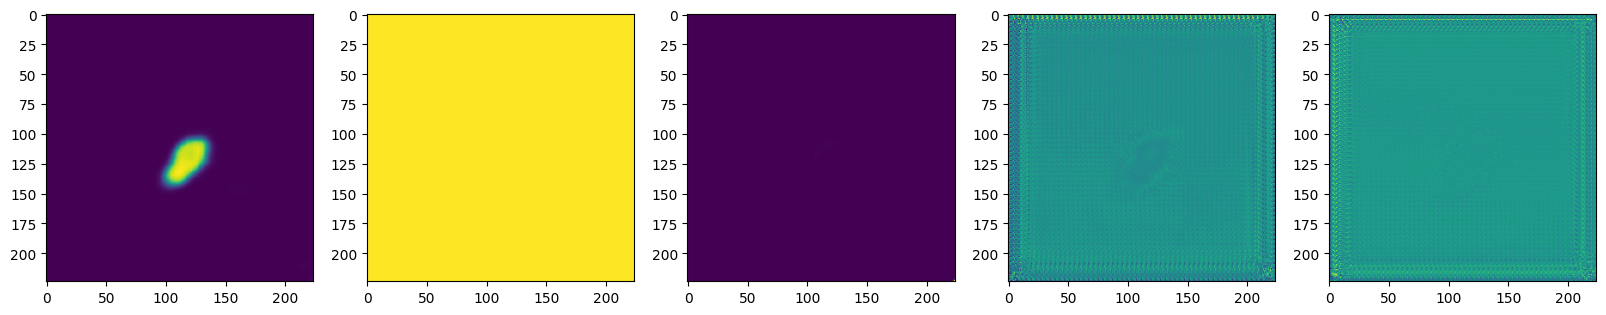

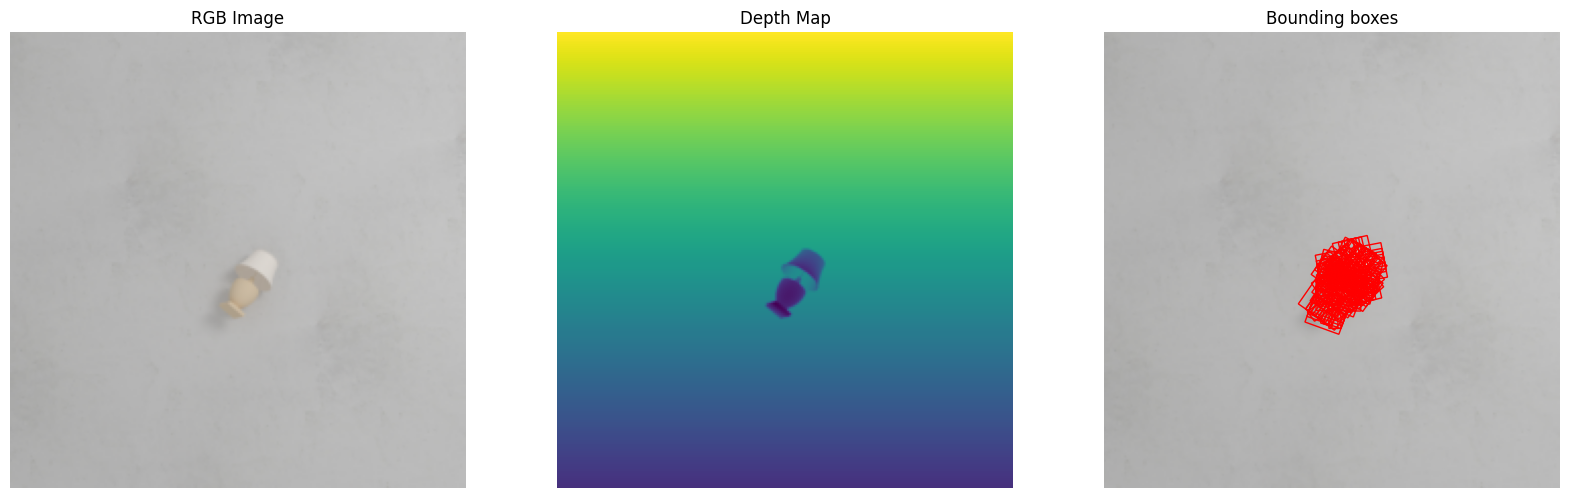

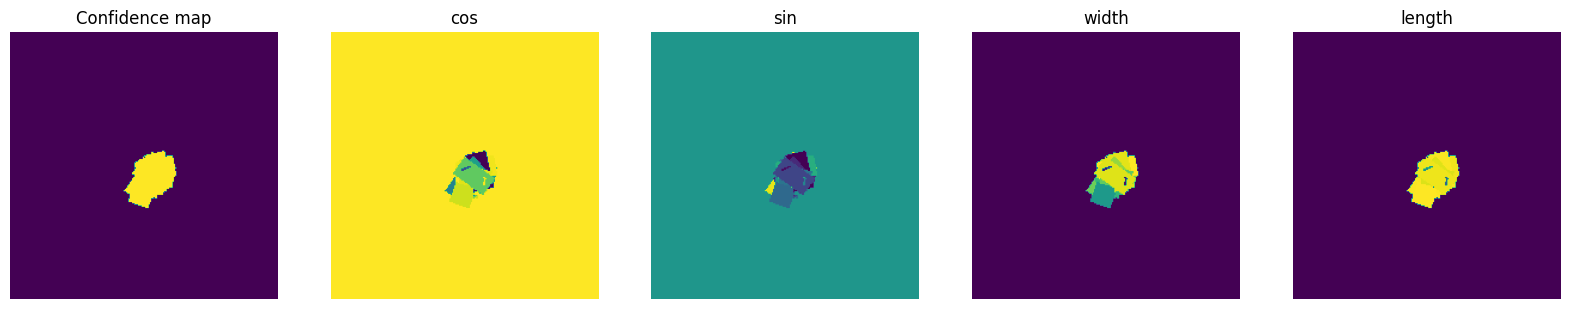

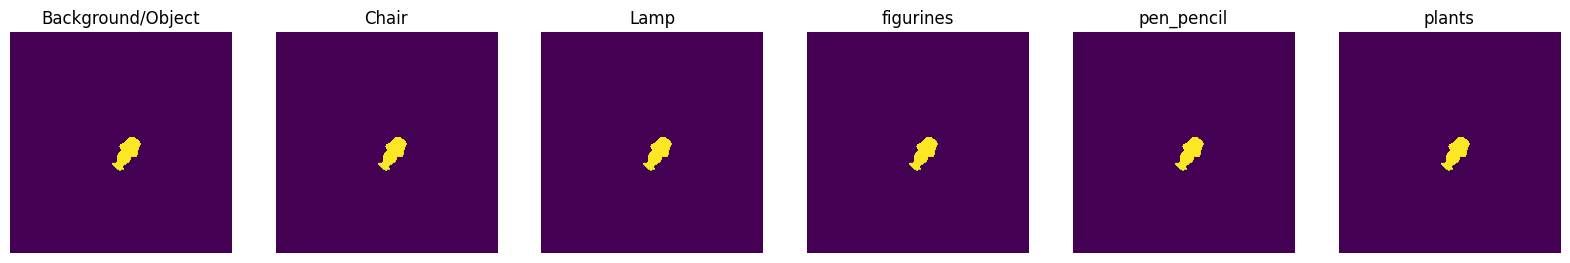

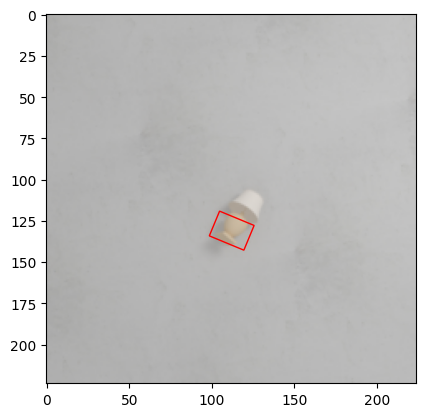

In [52]:
idx = 300
input_img = dataset[idx][0]
output = trainer.model(input_img.unsqueeze(0).to("mps"))[0]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
ax = ax.flatten()

for a, map in zip(ax, output):
    a.imshow(map.detach().cpu())

dataset.visualize(idx)

conf, cos, sin, width, length = output.detach()
conf, angle, width, length = post_process_map_output(conf, cos, sin, width, length)

grasps = grasps_from_map(conf, angle, width, length, num_peaks=1)
rects = grasp_rect_from_grasps(grasps)

fig, ax = plt.subplots()
from matplotlib.patches import Polygon

ax.imshow(input_img[:-1].permute(1, 2, 0))
for rect in rects:
    p = Polygon(rect, linewidth=1, edgecolor="r", facecolor="none")
    ax.add_patch(p)